# Problem Set 4: Neural Networks

### Demonstrate that in a neural network, to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set

#### Softmax function:
1. A softmax function is used to convert the output from last but one layer of the neural network to a vector of probabilities that the given input features belongs to a certain class. 
2. It is generally used as the last layer of the neural network as it makes the neural network's output easier to interpret.
3. An interesting proporty is that the sum of this whole vector equates to 1 (since it is a vector of probabilities).

#### Negative Log-Likelihood:
<center><math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>L</mi>
  <mo stretchy="false">(</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="bold">y</mi>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;<!-- − --></mo>
  <mi>log</mi>
  <mo>&#x2061;<!-- ⁡ --></mo>
  <mo stretchy="false">(</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="bold">y</mi>
  </mrow>
  <mo stretchy="false">)</mo>
</math></center>
<br>
1. The softmax function is used along with the negative log-likelihood function.

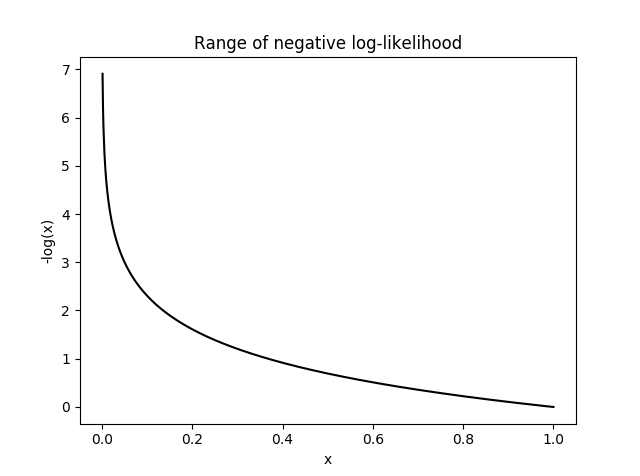

2. Since the value of negative log-likelihood (NLL) decreases with increase in x, it can be seen that when used as a loss function, NLL's value will decrease with increase in probability of the input features being a class.

Considering a 3-class example of cat, dog and horse:

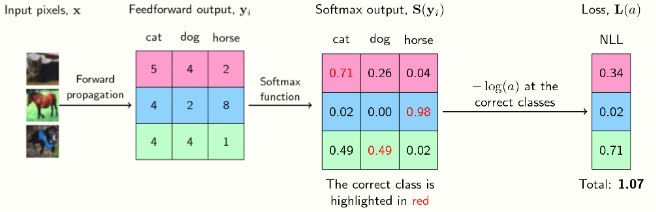

Thus, we see that higher confidence of the class leads to lower NLL loss - which is the same as maximizing the log-likelihood.

### Demonstrate that in a neural network, to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution is one that minimizes the criterion function with L2 regularization 

If we want to infer the parameter $\displaystyle \alpha $ from a set of input-output pairs $\displaystyle (x_1,y_1)\dots,(x_N,y_N) $ assuming that the outputs are linearly related to the inputs via $\displaystyle \alpha $ and corrupted by noise $\displaystyle \epsilon $, where $\displaystyle \epsilon $ is Gaussian noise with mean 0 and variance $\displaystyle \sigma^2 $. 
\begin{equation*}
y_n = \beta x_n + \epsilon
\end{equation*}
Gaussian likelihood of noise:
\begin{equation*}
\prod_{n=1}^N \mathcal{N}(y_n|\alpha x_n,\sigma^2)
\end{equation*}

Regularising the parameter $\displaystyle \alpha $ by imposing the Gaussian prior $\displaystyle \mathcal{N}(\beta|0,\lambda^{-1}), $ where $\displaystyle \lambda $ is a strictly positive scalar and combining the likelihood and the prior:
\begin{equation*}
\prod_{n=1}^N \mathcal{N}(y_n|\alpha x_n,\sigma^2) \mathcal{N}(\alpha|0,\lambda^{-1})
\end{equation*}

Taking the logarithm of this expression:
\begin{equation*}
\sum_{n=1}^N -\frac{1}{\sigma^2}(y_n-\alpha x_n)^2 - \lambda \alpha^2 + \mbox{const}
\end{equation*}
<br>
Maximizing this expression with respect to $\displaystyle \alpha $, gives maximum a-posteriori estimate for $\displaystyle \alpha $. Hence the Gaussian prior can be interpreted as a L2 regularization.

### Build a neural network with 1 hidden layer of 30 sigmoid nodes, and an output layer 10 softmax nodes from 1000 training images (100 images per digit). Train the network for 30 complete epochs, using mini-batches of 10 training examples at a time, a learning rate η=0.1. Plot the training error, testing error, criterion function on training data set, criterion function on testing data set of a separate 1000 testing images (100 images per digit), and the learning speed of the hidden layer (the average absolute changes of weights divided by the values of the weights).

In [2]:
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
#Using data loader from previous assignment

def load_mnist(kind='train'):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = ('%s-labels-idx1-ubyte.gz' % kind)
    images_path = ('%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


x_train, y_train = load_mnist(kind='train')
x_test, y_test = load_mnist(kind='t10k')

data_dict = {}

for i in range(10):
    data_dict[i] = list()

for i in range(len(x_train)):
    data_dict[y_train[i]].append(x_train[i])
    

train_x = list()
train_y = list()

for i in range(len(data)):
    for j in range(100):
        train_x.append(data[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

NameError: name 'np' is not defined

#### References:

[1] https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/ <br>
[2] http://bjlkeng.github.io/posts/probabilistic-interpretation-of-regularization/ <br>
[3] https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior <br>